In [1]:
get_ipython().magic(u'matplotlib inline')
from __future__ import division, print_function

from scipy import stats as ss
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats import multitest
from statsmodels.regression.quantile_regression import QuantReg

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


/opt/conda/envs/python2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [8]:
df = pd.read_csv('safety.dat', sep=' ')
df['graffiti'] = np.array(df['graffiti'] == 'Yes', dtype='d')
features = ['mov_cars', 'park_cars', 'landscape', 
            'mov_ciclyst', 'street_wid', 'build_ident', 'trees', 
            'diff_build', 'people', 'build_height', 'graffiti']#, 'red', 'green', 'blue', 'debris']


0      0.0
1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
6      0.0
7      0.0
8      0.0
9      0.0
10     0.0
11     0.0
12     0.0
13     0.0
14     0.0
15     0.0
16     0.0
17     0.0
18     0.0
19     1.0
20     0.0
21     0.0
22     1.0
23     0.0
24     0.0
25     1.0
26     0.0
27     1.0
28     0.0
29     0.0
      ... 
78     0.0
79     0.0
80     1.0
81     0.0
82     0.0
83     0.0
84     0.0
85     0.0
86     1.0
87     0.0
88     0.0
89     0.0
90     0.0
91     0.0
92     0.0
93     0.0
94     0.0
95     1.0
96     0.0
97     0.0
98     0.0
99     0.0
100    0.0
101    0.0
102    1.0
103    0.0
104    0.0
105    0.0
106    0.0
107    0.0
Name: graffiti, dtype: float64


!!!!!!!!!!!!!!!
('Jovem', 'Adulto')
!!!!!!!!!!!!!!!
>>>>>>> Quantile 0.1
                          QuantReg Regression Results                           
Dep. Variable:     RankJovem-RankAdulto   Pseudo R-squared:               0.1597
Model:                         QuantReg   Bandwidth:                       39.54
Method:                   Least Squares   Sparsity:                        168.9
Date:                  Mon, 23 May 2016   No. Observations:                  108
Time:                          23:28:46   Df Residuals:                       94
                                          Df Model:                           13
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
mov_cars         1.7984      4.014      0.448      0.655        -6.171     9.768
park_cars        0.5356      1.983      0.270      0.788        -3.401     4.472
landscape       28.0745     10.038  

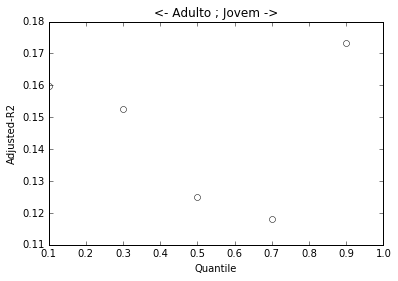

Number of variables w p < 0.05 per quantile


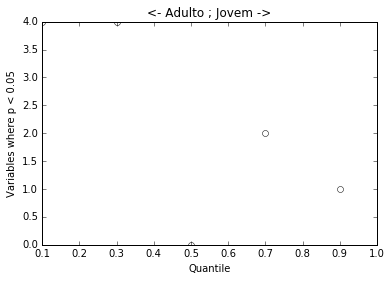

Looking into important variables


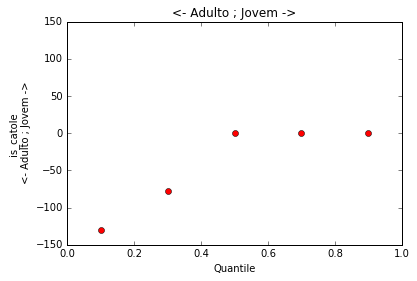

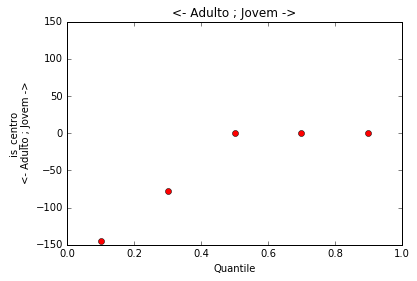

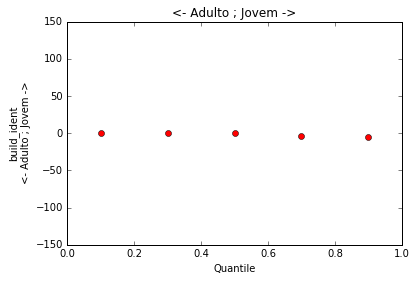

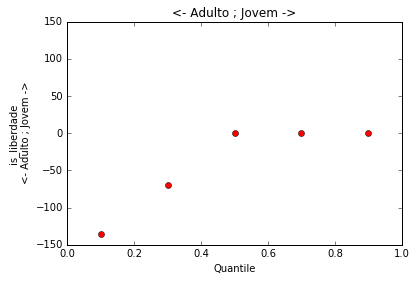

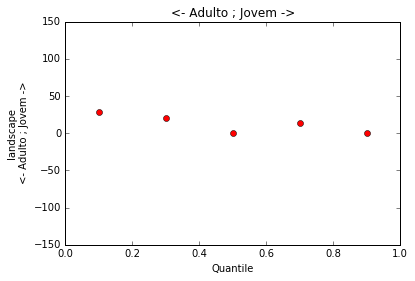

!!!!!!!!!!!!!!!
('Masculino', 'Feminino')
!!!!!!!!!!!!!!!
>>>>>>> Quantile 0.1
                             QuantReg Regression Results                              
Dep. Variable:     RankMasculino-RankFeminino   Pseudo R-squared:               0.1905
Model:                               QuantReg   Bandwidth:                       40.79
Method:                         Least Squares   Sparsity:                        163.1
Date:                        Mon, 23 May 2016   No. Observations:                  108
Time:                                23:28:53   Df Residuals:                       94
                                                Df Model:                           13
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
mov_cars         2.2109      6.898      0.321      0.749       -11.485    15.907
park_cars        3.9739      2.376      1.673      0.098        -0.74

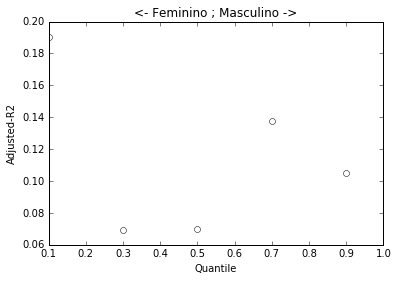

Number of variables w p < 0.05 per quantile


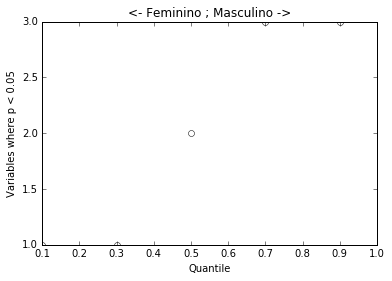

Looking into important variables


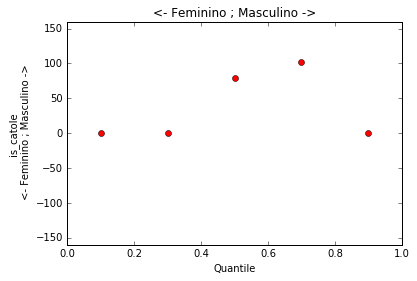

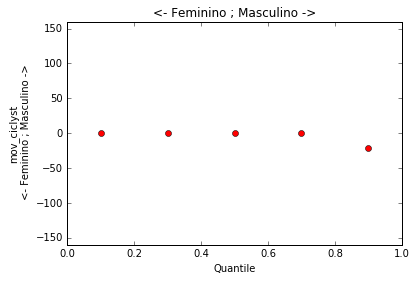

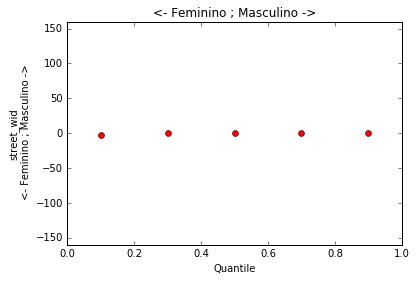

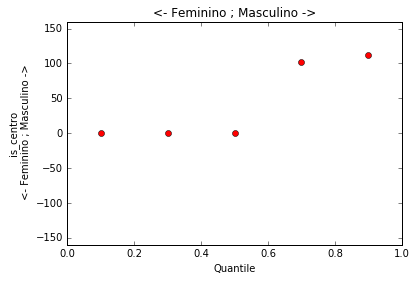

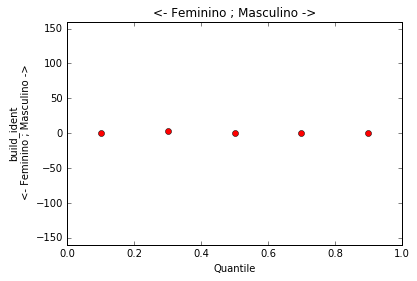

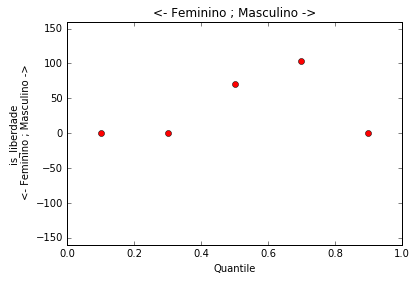

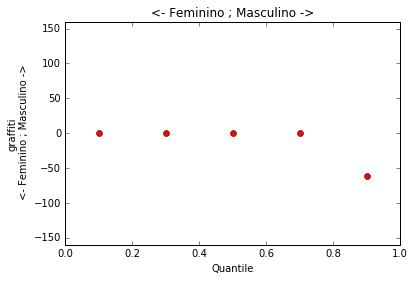

!!!!!!!!!!!!!!!
('Baixa', 'Media')
!!!!!!!!!!!!!!!
>>>>>>> Quantile 0.1
                          QuantReg Regression Results                          
Dep. Variable:     RankBaixa-RankMedia   Pseudo R-squared:              0.09811
Model:                        QuantReg   Bandwidth:                       43.25
Method:                  Least Squares   Sparsity:                        171.4
Date:                 Mon, 23 May 2016   No. Observations:                  108
Time:                         23:29:00   Df Residuals:                       94
                                         Df Model:                           13
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
mov_cars        -0.4498      4.321     -0.104      0.917        -9.030     8.130
park_cars        0.3473      2.621      0.133      0.895        -4.856     5.551
landscape        2.6305      8.529      0.30

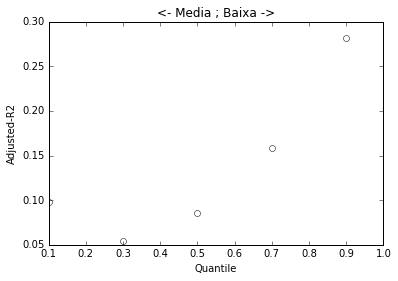

Number of variables w p < 0.05 per quantile


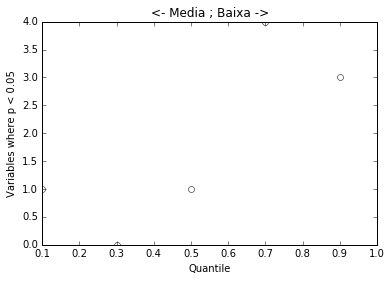

Looking into important variables


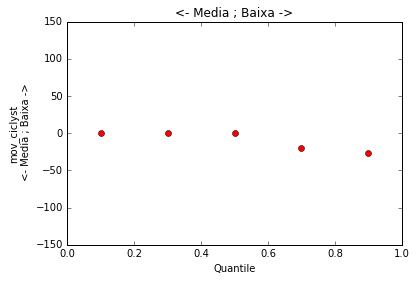

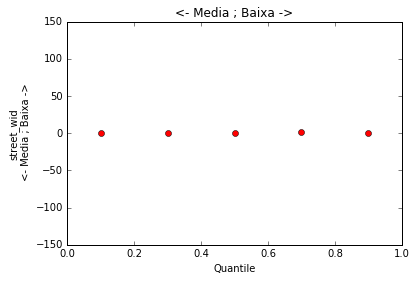

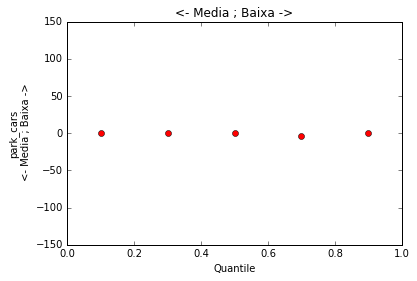

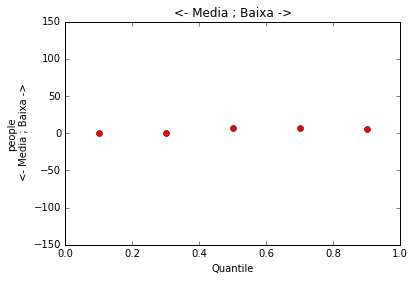

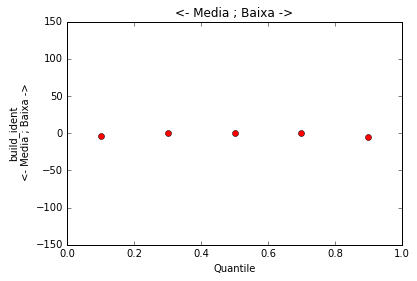

!!!!!!!!!!!!!!!
('Casado', 'Solteiro')
!!!!!!!!!!!!!!!
>>>>>>> Quantile 0.1
                            QuantReg Regression Results                            
Dep. Variable:     RankCasado-RankSolteiro   Pseudo R-squared:               0.1341
Model:                            QuantReg   Bandwidth:                       40.31
Method:                      Least Squares   Sparsity:                        171.1
Date:                     Mon, 23 May 2016   No. Observations:                  108
Time:                             23:29:09   Df Residuals:                       94
                                             Df Model:                           13
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
mov_cars        -2.0347      4.657     -0.437      0.663       -11.281     7.211
park_cars        3.5189      2.109      1.669      0.099        -0.668     7.706
landscape   

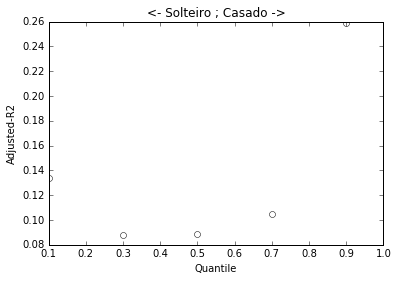

Number of variables w p < 0.05 per quantile


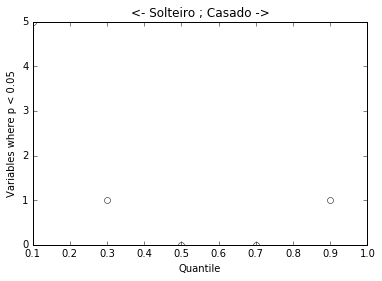

Looking into important variables


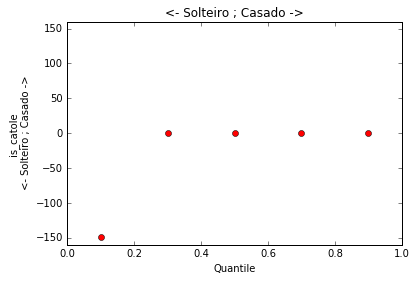

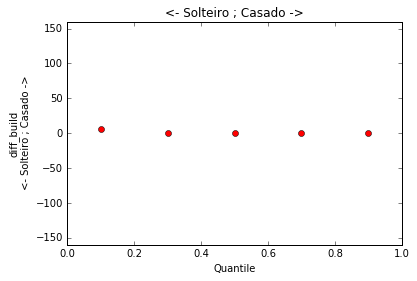

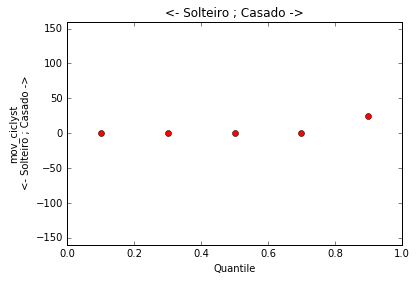

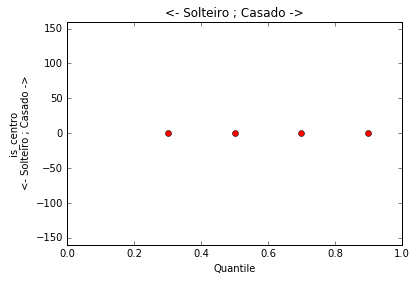

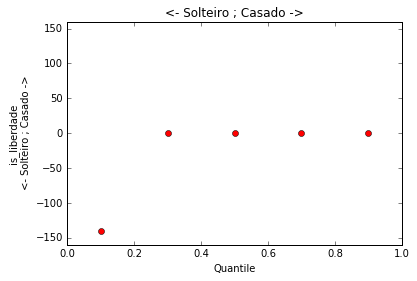

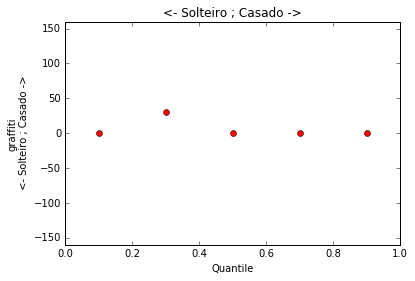

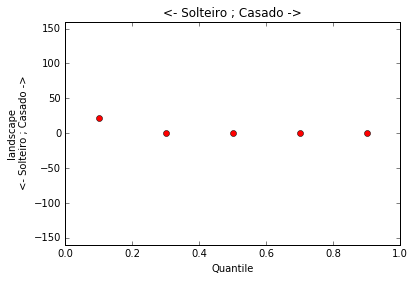

In [10]:
np.warnings.filterwarnings("ignore")
groups = [('Jovem', 'Adulto'), ('Masculino', 'Feminino'), ('Baixa', 'Media'), ('Casado', 'Solteiro')]
yLimits = {}
for first_min_second in groups:
    
    print('!!!!!!!!!!!!!!!')
    print(first_min_second)
    print('!!!!!!!!!!!!!!!')
    
    rankg1 = df['V3.%s' % first_min_second[0]].argsort()
    rankg2 = df['V3.%s' % first_min_second[1]].argsort()
    
    rankg1 = rankg1.values#Descending order!
    rankg2 = rankg2.values
    
    response = np.array((rankg1 - rankg2), dtype='d')# ** 3

    #rankg1 = df['V3.%s' % first_min_second[0]].argsort().values#Increasing order!
    #rankg2 = df['V3.%s' % first_min_second[1]].argsort().values
    #response = np.array((rankg1 - rankg2), dtype='d')# ** 3
    #response = MinMaxScaler().fit_transform(response[:, None])[:, 0]
    response = pd.DataFrame(response, columns=['Rank%s-Rank%s' % first_min_second])
    
    explanatory = df[features].copy()
    #explanatory = pd.DataFrame(MinMaxScaler().fit_transform(explanatory.copy().values),
    #                      columns=explanatory.columns)
    #explanatory['intercept'] = np.ones(len(explanatory), dtype='d')
    explanatory['is_catole'] = np.array(df['bairro'] == 'catole', dtype='d')
    explanatory['is_centro'] = np.array(df['bairro'] == 'centro', dtype='d')
    explanatory['is_liberdade'] = np.array(df['bairro'] == 'liberdade', dtype='d')
    
    model = QuantReg(response, explanatory)
    max_left = 0.0
    max_left_q = 0
    max_right = 0.0
    max_right_q = 0
    
    rsqs = []
    qs = []
    util = []
    
    values = {}
    for name in explanatory.columns:
        values[name] = np.zeros(5)
        i = 0
        for q in np.array([0.1, 0.3, 0.5, 0.7, 0.9]):#np.linspace(0.05, 0.95, 5):#np.linspace(0.05, 0.95, 10):
            values[name][i] = 0
            i += 1
            
    for i, q in enumerate(np.array([0.1, 0.3, 0.5, 0.7, 0.9])):#(np.linspace(0.05, 0.95, 5)):
        fitted = model.fit(q=q)
        adjr2 = fitted.prsquared
        qs.append(q)
        rsqs.append(adjr2)
        
        print(">>>>>>> Quantile " + str(q))
        print(fitted.summary())
        
        for name in fitted.params[fitted.pvalues < 0.05].index:
            if fitted.params[name] != 0:
                values[name][i] = fitted.params[name]
                #for i in range(0,10):
                print(first_min_second[0]+"_"+first_min_second[1]+"\t"+name+"\t"+str(fitted.params[name])
                      +"\t"+str(q)+"\t"+str(fitted.pvalues[name]))
            
        util.append(sum(fitted.pvalues < 0.05))
        
        if q > 0.5 and adjr2 > max_right:
            max_right = adjr2
            max_right_q = q
            
        if q < 0.5 and adjr2 > max_left:
            max_left = adjr2
            max_left_q = q
            
    #fitted_left = model.fit(q=max_left_q)
    #good_left = fitted_left.params[fitted_left.pvalues < 0.05]
    
    #fitted_right = model.fit(q=max_right_q)
    #good_right = fitted_right.params[fitted_right.pvalues < 0.05]    

    print('Looking into model quality. Extremes are better, indicating that it is where features matter')
    plt.title('<- %s ; %s ->' % (first_min_second[1], first_min_second[0]))
    plt.plot(qs, rsqs, 'wo')
    plt.xlabel('Quantile')
    plt.ylabel('Adjusted-R2')
    plt.show()
    
    print('Number of variables w p < 0.05 per quantile')
    plt.title('<- %s ; %s ->' % (first_min_second[1], first_min_second[0]))
    plt.plot(qs, util, 'wo')
    plt.xlabel('Quantile')
    plt.ylabel('Variables where p < 0.05')
    plt.show()
    
    print('Looking into important variables')
    if first_min_second[0] == 'Jovem':
        yLimits[first_min_second] = [-150, 150]
    elif first_min_second[0] == 'Masculino':
        yLimits[first_min_second] = [-160, 160]
    elif first_min_second[0] == 'Casado':
        yLimits[first_min_second] = [-160, 160]
    elif first_min_second[0] == 'Baixa':
        yLimits[first_min_second] = [-150, 150]
        
    
    #plt.title('<- %s ; %s ->' % (first_min_second[1], first_min_second[0]))
    #plt.xlabel('Quantile')
    #plt.ylabel('Features\n <- %s ; %s ->' % (first_min_second[1], first_min_second[0]))
    #axes = plt.gca()
    #axes.set_xlim([0,1])
    #axes.set_ylim(yLimits[first_min_second])

    use_colours = {"street_wid": "gray", "mov_cars": "red", "park_cars": "lightsalmon"
                   , "mov_ciclyst": "yellow", "landscape": "blue", "build_ident": "lightblue", 
                   "trees": "green", "build_height": "darkgray", "diff_build": "purple", 
                   "people": "orange", "graffiti": "black", "is_catole": "salmon", "is_centro": "springgreen",
                   "is_liberdade": "magenta"}

    for name in values:
        y = values[name]
        if y.any():
            plt.title('<- %s ; %s ->' % (first_min_second[1], first_min_second[0]))
            plt.plot(qs, y, 'ro')
            plt.xlabel('Quantile')
            plt.ylabel(name + '\n <- %s ; %s ->' % (first_min_second[1], first_min_second[0]))
            axes = plt.gca()
            axes.set_xlim([0,1])
            axes.set_ylim(yLimits[first_min_second])
            plt.show()

            #plt.figure(1) 
            #plt.plot(qs, y, 'ro')#plt.plot(qs, y, 'ro')
            #plt.scatter(qs,y,c=[use_colours[name] for name in values],s=50)


    #plt.show()


/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence c

0.05
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.1185
Model:                       QuantReg   Bandwidth:                       54.69
Method:                 Least Squares   Sparsity:                        234.6
Date:                Tue, 17 May 2016   No. Observations:                  108
Time:                        20:17:17   Df Residuals:                       91
                                        Df Model:                           16
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
mov_cars         2.9962      7.244      0.414      0.680       -11.393    17.385
park_cars       -2.3368      3.386     -0.690      0.492        -9.062     4.388
debris          14.8123     16.597      0.892      0.374       -18.155    47.780
landscape        5.3612     15.137   

/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:193: IterationLimitWarning: Maximum number of iterations (1000) reached.
  IterationLimitWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)





0.15
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.1507
Model:                       QuantReg   Bandwidth:                       41.50
Method:                 Least Squares   Sparsity:                        126.3
Date:                Tue, 17 May 2016   No. Observations:                  108
Time:                        20:17:18   Df Residuals:                       91
                                        Df Model:                           16
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
mov_cars         5.4528      4.596      1.186      0.239        -3.676    14.582
park_cars       -0.5649      2.259     -0.250      0.803        -5.053     3.923
debris          -7.6196      9.803     -0.777      0.439       -27.091    11.852
landscape        5.6660     10.352

/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)





0.25
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.1345
Model:                       QuantReg   Bandwidth:                       37.88
Method:                 Least Squares   Sparsity:                        111.2
Date:                Tue, 17 May 2016   No. Observations:                  108
Time:                        20:17:18   Df Residuals:                       91
                                        Df Model:                           16
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
mov_cars         0.5084      3.783      0.134      0.893        -7.007     8.023
park_cars       -1.5070      1.785     -0.844      0.401        -5.052     2.038
debris          -3.7593      8.777     -0.428      0.669       -21.194    13.675
landscape        5.7837      9.612

/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)





0.35
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.1194
Model:                       QuantReg   Bandwidth:                       34.83
Method:                 Least Squares   Sparsity:                        98.81
Date:                Tue, 17 May 2016   No. Observations:                  108
Time:                        20:17:19   Df Residuals:                       91
                                        Df Model:                           16
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
mov_cars         3.6561      3.479      1.051      0.296        -3.255    10.567
park_cars       -0.7977      1.628     -0.490      0.625        -4.031     2.436
debris         -11.0129      8.409     -1.310      0.194       -27.717     5.691
landscape        8.8026      9.316

/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)





0.45
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.09415
Model:                       QuantReg   Bandwidth:                       33.96
Method:                 Least Squares   Sparsity:                        93.13
Date:                Tue, 17 May 2016   No. Observations:                  108
Time:                        20:17:19   Df Residuals:                       91
                                        Df Model:                           16
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
mov_cars         1.5968      3.464      0.461      0.646        -5.284     8.478
park_cars       -1.5065      1.659     -0.908      0.366        -4.801     1.788
debris         -20.2672      8.605     -2.355      0.021       -37.360    -3.174
landscape       16.7970      9.216

/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence c




0.55
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.08416
Model:                       QuantReg   Bandwidth:                       35.96
Method:                 Least Squares   Sparsity:                        95.68
Date:                Tue, 17 May 2016   No. Observations:                  108
Time:                        20:17:19   Df Residuals:                       91
                                        Df Model:                           16
                   coef    std err          t      P>|t|      [95.0% Conf. Int.]
--------------------------------------------------------------------------------
mov_cars         0.8994      3.694      0.243      0.808        -6.439     8.238
park_cars       -1.9467      1.688     -1.154      0.252        -5.299     1.405
debris         -14.8812      9.246     -1.609      0.111       -33.247     3.485
landscape       11.2679      9.722

/Users/flaviov/anaconda/lib/python2.7/site-packages/statsmodels/regression/quantile_regression.py:189: ConvergenceWarning: Convergence cycle detected
  warnings.warn("Convergence cycle detected", ConvergenceWarning)
